# Racial disparity in police stops and killings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300

In [2]:
df = pd.read_excel("data/MPVDatasetDownload.xlsx", sheet_name="2013-2019 Killings by State")

In [3]:
df.head()

,State,State Abbreviation,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,...,Rate (Hispanic People),Rate (Native American People),Rate (Asian People),Rate (Pacific Islanders),Rate (White People),Rate (All People),Disparity in Rate,Black-White Disparity,Hispanic-White Disparity,Native American-White Disparity
0,Alabama,AL,4864680.0,1285737.0,203146.0,23243.0,63936.0,1521.0,3196730.0,90367.0,...,0.000000,0.000000,2.234377,0.000000,3.306951,4.052535,1.453111,1.780730,0.000000,0.000000
1,Alaska,AK,738516.0,22817.0,51186.0,103506.0,45617.0,8544.0,450754.0,56092.0,...,2.790942,16.562187,0.000000,0.000000,5.704727,7.737525,3.236692,4.390041,0.489233,2.903239
2,Arizona,AZ,6946685.0,286614.0,2163312.0,271946.0,222477.0,12523.0,3825886.0,163927.0,...,7.594176,7.354401,0.000000,0.000000,5.302227,7.012595,2.203370,2.914124,1.432262,1.387040
3,Arkansas,AR,2990671.0,458536.0,219052.0,17342.0,43441.0,7877.0,2173849.0,70574.0,...,1.956483,0.000000,3.288533,0.000000,3.942973,4.967829,1.944122,2.449438,0.496195,0.000000
4,California,CA,39148760.0,2164519.0,15221577.0,138427.0,5525439.0,138911.0,14695836.0,1264051.0,...,4.570580,7.224024,1.137595,9.255669,3.275952,4.302271,2.868695,3.767425,1.395191,2.205168


## Disparity in killings

**What is disparity?**

It's easier to explain through an example: Assume 40% of the population are Black and that 45% of the total victims of police violence are Black. In this case the disparity is 5% because there are 5% more victims from what they "should" be according to their population ration.

The dataset we use already had the disparity for black victims so now we're going to calculate the same metric for hispanic and white victims.

First we calculate the percentage of white and hispanic population per state.

In [4]:
df["% Hispanic"] = df["Hispanic Population"] / df["Total Population"] 
df["% White"] = df["White Population"] / df["Total Population"] 

In [5]:
df_perce = df[["State Abbreviation", "% African-American", "% Hispanic", "% White"]]

In [6]:
df_perce = df_perce.rename(columns={"State Abbreviation" : "State", "% African-American": "Black", "% Hispanic": "Hispanic", "% White": "White"})

In [7]:
df_perce["black_disparity"] = df["Disparity"].iloc[:]

Now let's find how many people died of each race and the total number of victims per state

In [8]:
df_perce["total_victims"] = df["# People Killed"]

In [9]:
df_perce["white_victims"] = df["# White people killed"]
df_perce["hispanic_victims"] = df["# Hispanic people killed"]

In [10]:
df_perce = df_perce.iloc[:51] # drop trailing nans

In [11]:
df_perce.fillna(0, inplace=True)

Now we calculate the percentage of victims of each race by dividing the number of victims of that race by the total number of victims

In [12]:
df_perce["white_victims"] = df_perce["white_victims"] / df_perce["total_victims"]
df_perce["hispanic_victims"] = df_perce["hispanic_victims"] / df_perce["total_victims"]

And finally we calculate the disparity for white and hispanic people

In [13]:
df_perce["white_disparity"] = df_perce["white_victims"] - df_perce["White"]
df_perce["hispanic_disparity"] = df_perce["hispanic_victims"] - df_perce["Hispanic"]

In [14]:
disparities = df_perce.drop(["total_victims", "white_victims", "hispanic_victims"], axis = 1).iloc[:]

In [15]:
disparities.head()

,State,Black,Hispanic,White,black_disparity,white_disparity,hispanic_disparity
0,AL,0.264300,0.041759,0.657131,0.119758,-0.120899,-0.041759
1,AK,0.030896,0.069309,0.610351,0.069104,-0.160351,-0.044309
2,AZ,0.041259,0.311416,0.550750,0.049650,-0.134328,0.025827
3,AR,0.153322,0.073245,0.726877,0.144755,-0.149954,-0.044399
4,CA,0.055290,0.388814,0.375384,0.103319,-0.089549,0.024248


In [16]:
disparities_no_stops = disparities.iloc[:]

## Disparity in stops

Now let's calculate the disparity per race and per state for police stops!

In [17]:
stops = pd.read_csv("./data/opp-stops_state.csv")

In [18]:
stops.head()

,state,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
0,AZ,Statewide,AZ,Apache County,white,NaN,0.077444,NaN,NaN,7064.888889,293234.024096
1,AZ,Statewide,AZ,Apache County,black,NaN,0.115928,NaN,NaN,385.246753,32012.963855
2,AZ,Statewide,AZ,Apache County,hispanic,NaN,0.065497,NaN,NaN,1280.962025,137774.746988
3,AZ,Statewide,AZ,Cochise County,white,NaN,0.077444,NaN,NaN,12371.855422,293234.024096
4,AZ,Statewide,AZ,Cochise County,black,NaN,0.115928,NaN,NaN,1568.810127,32012.963855


We will reuse the demographics we calculated before

In [19]:
disparities_stops = disparities.drop(["black_disparity", "white_disparity", "hispanic_disparity"], axis = 1)

First we'll create 3 dataframes (one for each race) that contain the state and number of victims

In [20]:
stops_perce = {}
for state in set(stops["state"]):
    for race in set(["black", "white", "hispanic"]):
        stops_perce[(state, race)] =  stops.groupby(["state", "subject_race"]).get_group((state, race))["stops_per_year"].sum() / stops.groupby(["state"]).get_group((state))["stops_per_year"].sum()

In [21]:
black_disp = {}
white_disp = {}
hispanic_disp = {}

for state in set(stops["state"]):
    black_disp[state] = stops_perce[(state, "black")]
    white_disp[state] = stops_perce[(state, "white")]
    hispanic_disp[state] = stops_perce[(state, "hispanic")]

In [22]:
black_stops = pd.DataFrame(black_disp.items(), columns=["State", "black_stop_perce"])
white_stops = pd.DataFrame(white_disp.items(), columns=["State", "white_stop_perce"])
hispanic_stops = pd.DataFrame(hispanic_disp.items(), columns=["State", "hispanic_stop_perce"])

Now we merge all these dataframes with the original one

In [23]:
disparities_stops = disparities_stops.merge(black_stops, on = "State").merge(white_stops, on = "State").merge(hispanic_stops, on = "State")

In [24]:
disparities_stops.head()

,State,Black,Hispanic,White,black_stop_perce,white_stop_perce,hispanic_stop_perce
0,AZ,0.041259,0.311416,0.550750,0.069454,0.631994,0.298552
1,CA,0.055290,0.388814,0.375384,0.097157,0.510918,0.391925
2,CO,0.039184,0.214204,0.683080,0.034681,0.819285,0.146034
3,CT,0.098232,0.156859,0.675330,0.124470,0.770029,0.105501
4,FL,0.153752,0.251708,0.543586,0.202367,0.581038,0.216595


Then we calculate the disparity in stops

In [25]:
disparities_stops["black_disparity_stops"] = disparities_stops["black_stop_perce"] - disparities_stops["Black"]
disparities_stops["white_disparity_stops"] = disparities_stops["white_stop_perce"] - disparities_stops["White"]
disparities_stops["hispanic_disparity_stops"] = disparities_stops["hispanic_stop_perce"] - disparities_stops["Hispanic"]

In [26]:
disparities_stops = disparities_stops.drop(["black_stop_perce", "white_stop_perce", "hispanic_stop_perce"], axis = 1)

In [27]:
disparities_stops.head()

,State,Black,Hispanic,White,black_disparity_stops,white_disparity_stops,hispanic_disparity_stops
0,AZ,0.041259,0.311416,0.550750,0.028195,0.081244,-0.012865
1,CA,0.055290,0.388814,0.375384,0.041867,0.135534,0.003112
2,CO,0.039184,0.214204,0.683080,-0.004503,0.136205,-0.068170
3,CT,0.098232,0.156859,0.675330,0.026238,0.094699,-0.051358
4,FL,0.153752,0.251708,0.543586,0.048615,0.037452,-0.035113


And finally we merge with the disparity for killings dataframe using an inner join.

In [29]:
disparities = disparities.merge(disparities_stops, on = ["State", "Black", "Hispanic", "White"])

In [30]:
disparities.head()

,State,Black,Hispanic,White,black_disparity,white_disparity,hispanic_disparity,black_disparity_stops,white_disparity_stops,hispanic_disparity_stops
0,AZ,0.041259,0.311416,0.550750,0.049650,-0.134328,0.025827,0.028195,0.081244,-0.012865
1,CA,0.055290,0.388814,0.375384,0.103319,-0.089549,0.024248,0.041867,0.135534,0.003112
2,CO,0.039184,0.214204,0.683080,0.057732,-0.229336,0.094166,-0.004503,0.136205,-0.068170
3,CT,0.098232,0.156859,0.675330,0.096213,-0.147552,0.009808,0.026238,0.094699,-0.051358
4,FL,0.153752,0.251708,0.543586,0.159791,-0.090896,-0.110706,0.048615,0.037452,-0.035113


Now we will plot the distribution of police stops and killings accros all states per race

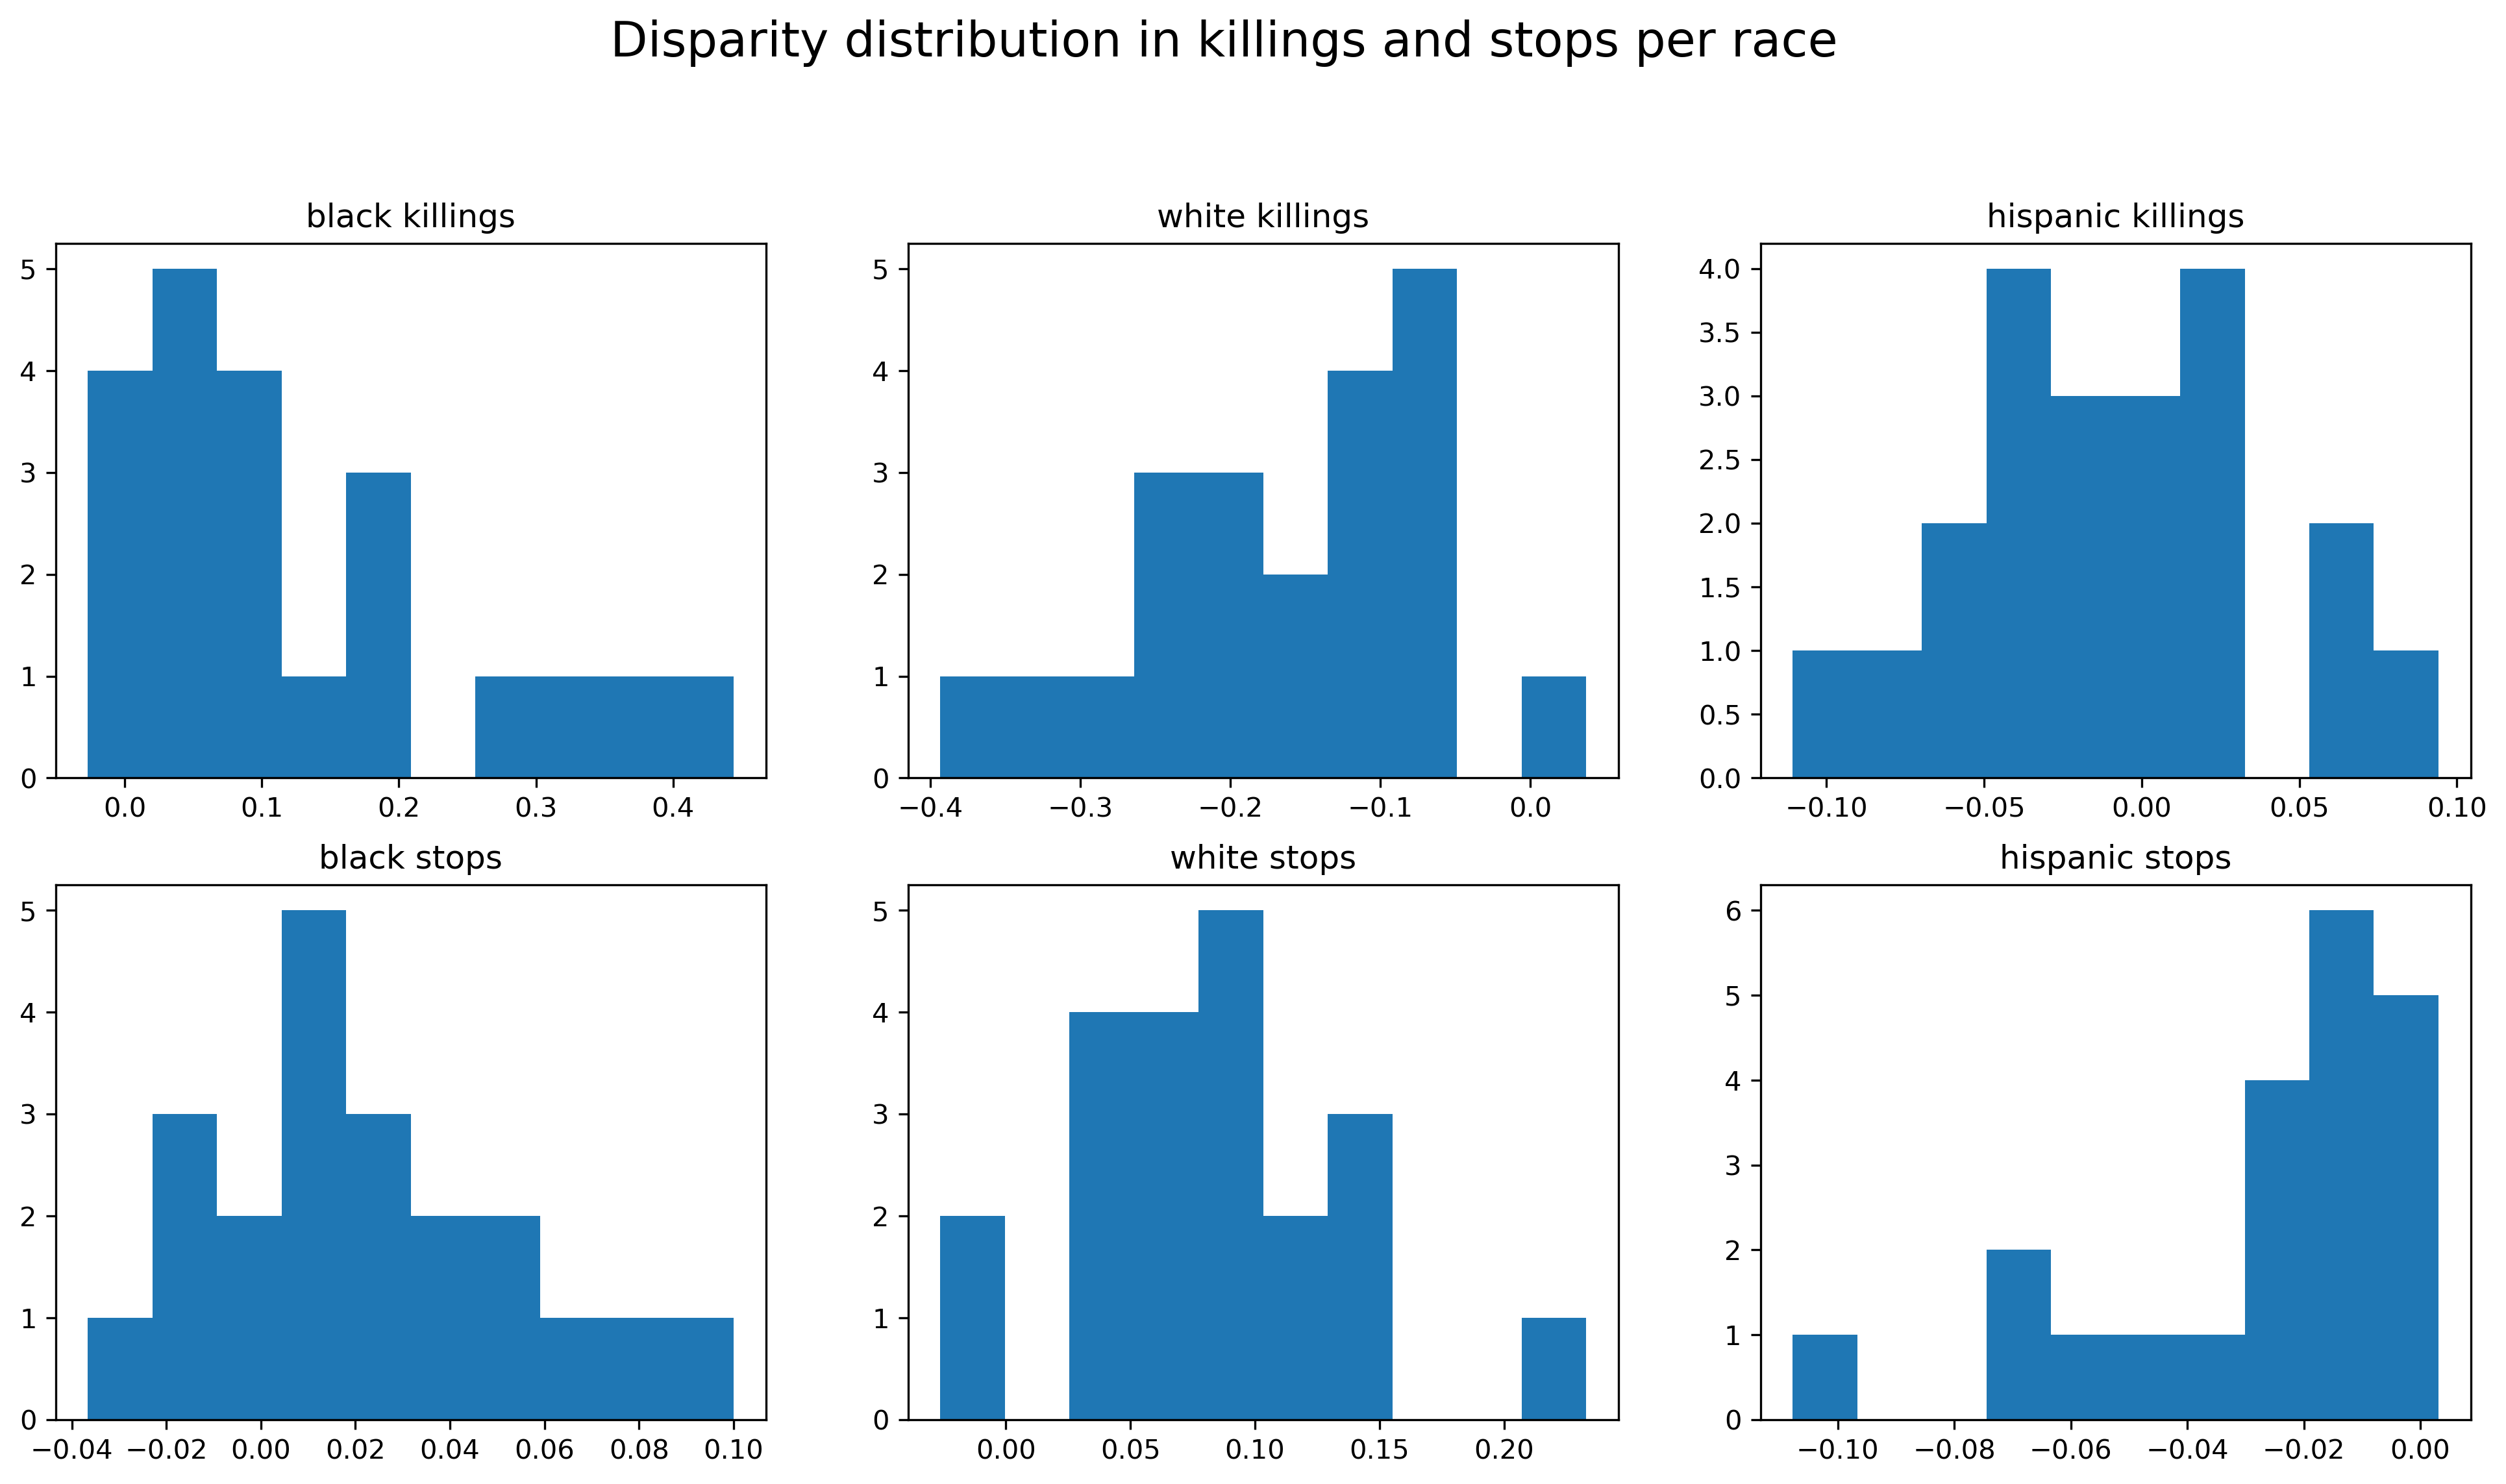

In [31]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(16, 8)
axs[0][0].set_title("black killings")
axs[1][0].set_title("black stops")
axs[0][0].hist(disparities["black_disparity"])
axs[1][0].hist(disparities["black_disparity_stops"])

axs[0][1].set_title("white killings")
axs[1][1].set_title("white stops")
axs[0][1].hist(disparities["white_disparity"])
axs[1][1].hist(disparities["white_disparity_stops"])

axs[0][2].set_title("hispanic killings")
axs[1][2].set_title("hispanic stops")
axs[0][2].hist(disparities["hispanic_disparity"])
axs[1][2].hist(disparities["hispanic_disparity_stops"])
#fig.text(0.5, 0.01, "Disparity", ha='center', fontsize = 18)
fig.text(0.5, 1, "Disparity distribution in killings and stops per race", ha='center', fontsize = 18)
plt.savefig("disparity_dist.png", bbox_inches='tight')

### Observations

From this plot we can extract some interesting obervations:
- When it comes to killings, the disparity for white people is almost always negative but when it comes to police stops it's almost always positive. A reason for that could be that police men don't hesitate to stop white people but their are skeptical when using violence against them.

- When it comes to black stops we see that disparity levels are heavily centered around zero with a very small standard deviation (compared to killings for example). This means that, in these states, there is no tendency of the police stopping disproportionally more black people.

- For Hispanics, we see that both for killings and stops, their disparity levels are very close to zero meaning that there is no strong indication of bias against this racial groups in this case.

## Disparity per year and state

Now let's give a time aspect to our study. Specifically, we're going to examine how disparities change per state through the years

In [32]:
def get_df_for_year(states, year):
    """
    Reads the data and restricts it to the states that we want to explore and the year
    """
    df = pd.read_excel("data/MPVDatasetDownload.xlsx", sheet_name="2013-2020 Police Killings")
    df = df[["Victim's race", "Date of Incident (month/day/year)", "State"] ]
    df.columns = ["race", "date", "state"]
    
    df["race"] = df.race.apply(lambda x: "Unknown" if x == "Unknown race" or x == "Unknown Race" or x == "unknown race" else x).iloc[:]
    df.fillna("Unknown", inplace=True)
    
    df = df[(df["race"] == "White") | (df["race"] == "Black") | (df["race"] == "Hispanic")].reset_index(drop = True).iloc[:] # only keep the races we care about
    df = df[(df["date"] >= f"{year}-01-01") & (df["date"] <= f"{year}-12-31")].reset_index(drop = True) # restrict to one year
    
    #Probably not the best way to create the dataframe but it works
    d = {}
    for state in states:
        l = []
        for race in ["Black", "White", "Hispanic"]:
            by_state = df.groupby("state")
            if state in by_state.groups:
                grouped = by_state.get_group(state).groupby("race")
                if race in grouped.groups:
                    l.append(grouped.get_group(race).size / 3)
                else:
                    l.append(0)
            else:
                l = [0, 0, 0]
        d[state] = l
    df = pd.DataFrame.from_dict(d).transpose().reset_index()
    
    # Normalize victim rates
    df.columns = ["state", "Black", "White", "Hispanic"]
    df["total"] = df["Black"] + df["White"] + df["Hispanic"]
    df["White"] = df["White"] / df["total"] 
    df["Black"] = df["Black"] / df["total"] 
    df["Hispanic"] = df["Hispanic"] / df["total"]
    df.fillna(0, inplace=True) # in case total victims were 0
    return df

In [33]:
def get_disparities_for_year(df, year):
    """
    Gets a Dataframe with demographics and calculates the number of victims and the disparity for each race for a specific year
    """
    df_year = get_df_for_year(set(df.State), year)
    df_year.rename(columns={"state" : "State"}, inplace=True)
    
    df_year = df_year[["State", "Black", "Hispanic", "White"]]
    df = df.merge(df_year, on="State",suffixes=("", "_victims"))
    
    df["black_disparity"] = df["Black_victims"] - df["Black"]
    df["white_disparity"] = df["White_victims"] - df["White"]
    df["hispanic_disparity"] = df["Hispanic_victims"] - df["Hispanic"]
    
    return df

In [34]:
get_disparities_for_year(disparities[["State", "Black", "Hispanic", "White"]], 2014).head()

,State,Black,Hispanic,White,Black_victims,Hispanic_victims,White_victims,black_disparity,white_disparity,hispanic_disparity
0,AZ,0.041259,0.311416,0.550750,0.121951,0.439024,0.439024,0.080692,-0.111725,0.127608
1,CA,0.055290,0.388814,0.375384,0.160839,0.503497,0.335664,0.105550,-0.039720,0.114683
2,CO,0.039184,0.214204,0.683080,0.090909,0.545455,0.363636,0.051725,-0.319444,0.331250
3,CT,0.098232,0.156859,0.675330,0.500000,0.500000,0.000000,0.401768,-0.675330,0.343141
4,FL,0.153752,0.251708,0.543586,0.365854,0.121951,0.512195,0.212101,-0.031391,-0.129757


In [35]:
def get_disparities_for_state(df, state):
    "Calculates and plots how the disparities change for a specific state throughout the years"
    l = []
    df = df[df["State"] == state]
    for year in range(2013, 2021):
        temp = get_disparities_for_year(df, year)
        l.append(temp[temp["State"] == state])
    df = pd.concat(l, axis = 0).drop(["State"], axis = 1).reset_index(drop = True)
    years = pd.DataFrame(list(range(2013, 2021)), columns=['year'])
    df = pd.concat([df, years], axis = 1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 4)

    df.plot(x = "year", y = "black_disparity", ax = ax, color = "black")
    df.plot(x = "year", y = "white_disparity", ax = ax, color = "blue")
    df.plot(x = "year", y = "hispanic_disparity", ax = ax, color = "red")
    
    ax.axhline(y = 0, color = "red", linestyle = "--")

    ax.set_ylabel("Disparities")
    ax.set_title(f"Disparities for {state} for 2013-2020")
    plt.savefig(f"images/{state}_disp.png", bbox_inches='tight')
    return df

First we plot the disparity for the 3 states with the strongest gun laws: California, New Jersey and Connecticut

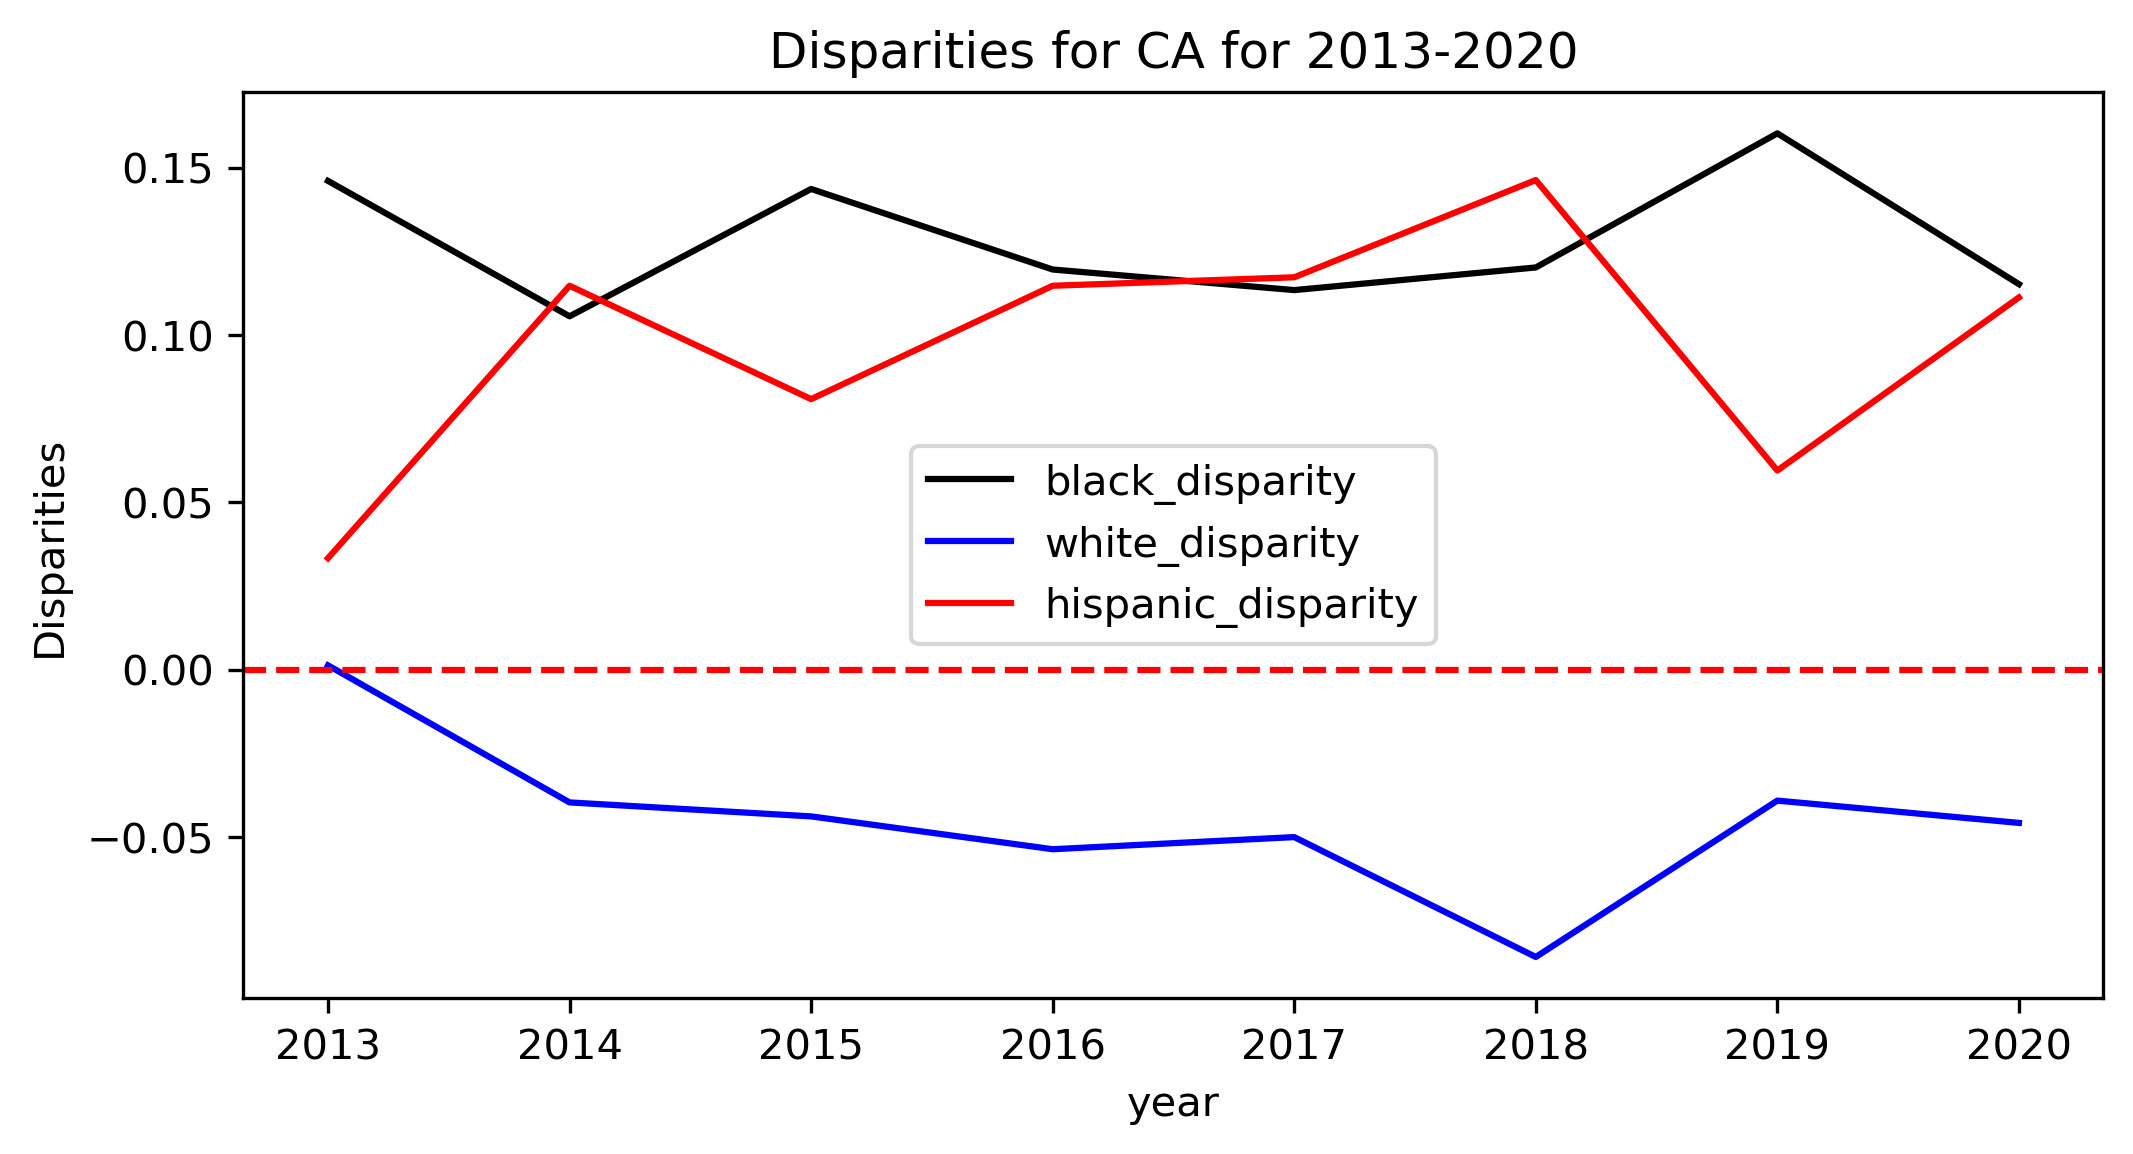

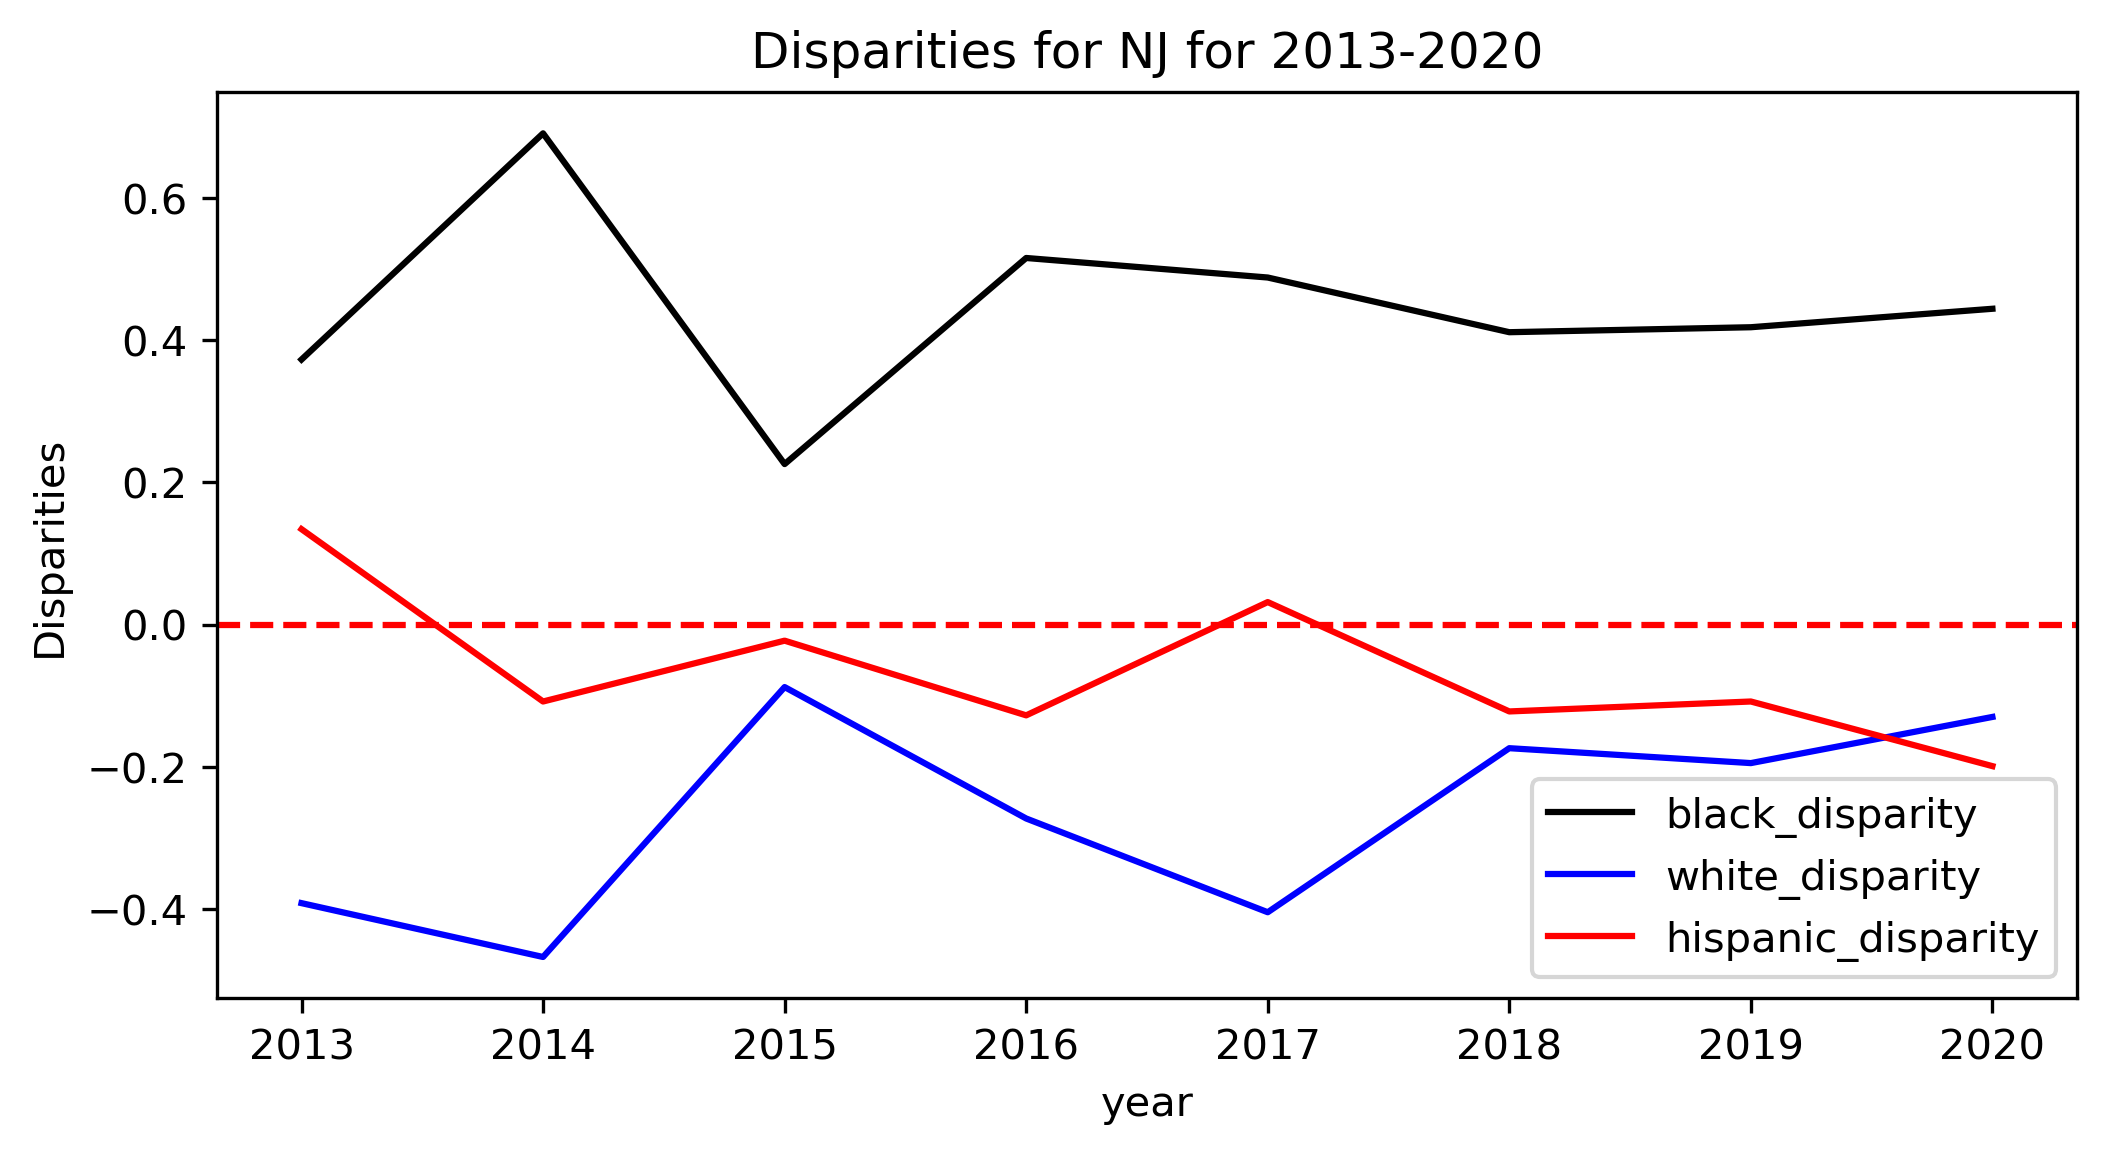

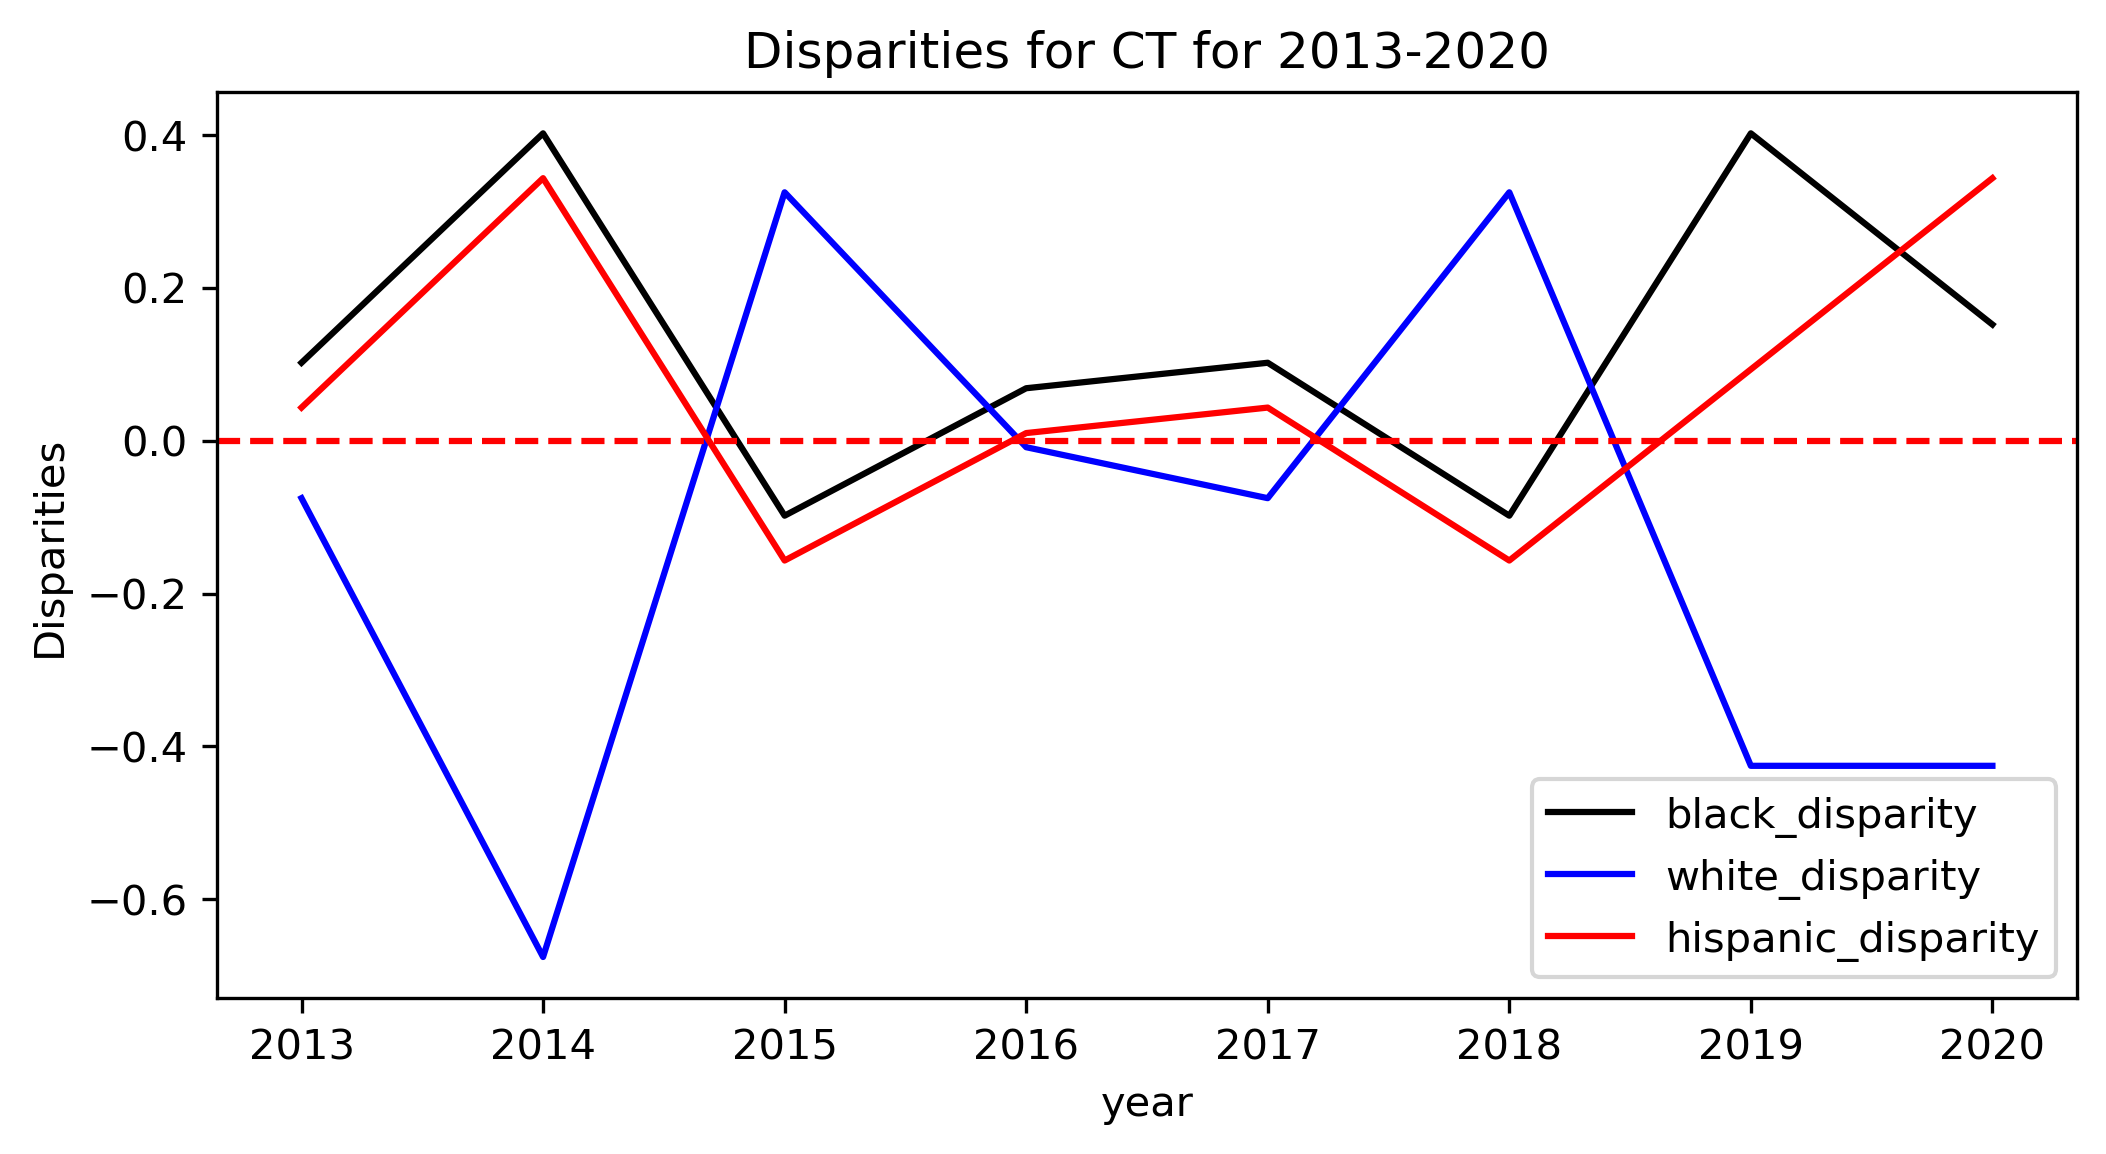

In [36]:
df = get_disparities_for_state(disparities_no_stops[["State", "Black", "Hispanic", "White"]], "CA")
df = get_disparities_for_state(disparities_no_stops[["State", "Black", "Hispanic", "White"]], "NJ")
df = get_disparities_for_state(disparities_no_stops[["State", "Black", "Hispanic", "White"]], "CT")

Then we plot the disparity for the 3 states with the weakest gun laws: Mississipi, Wyoming and Idaho

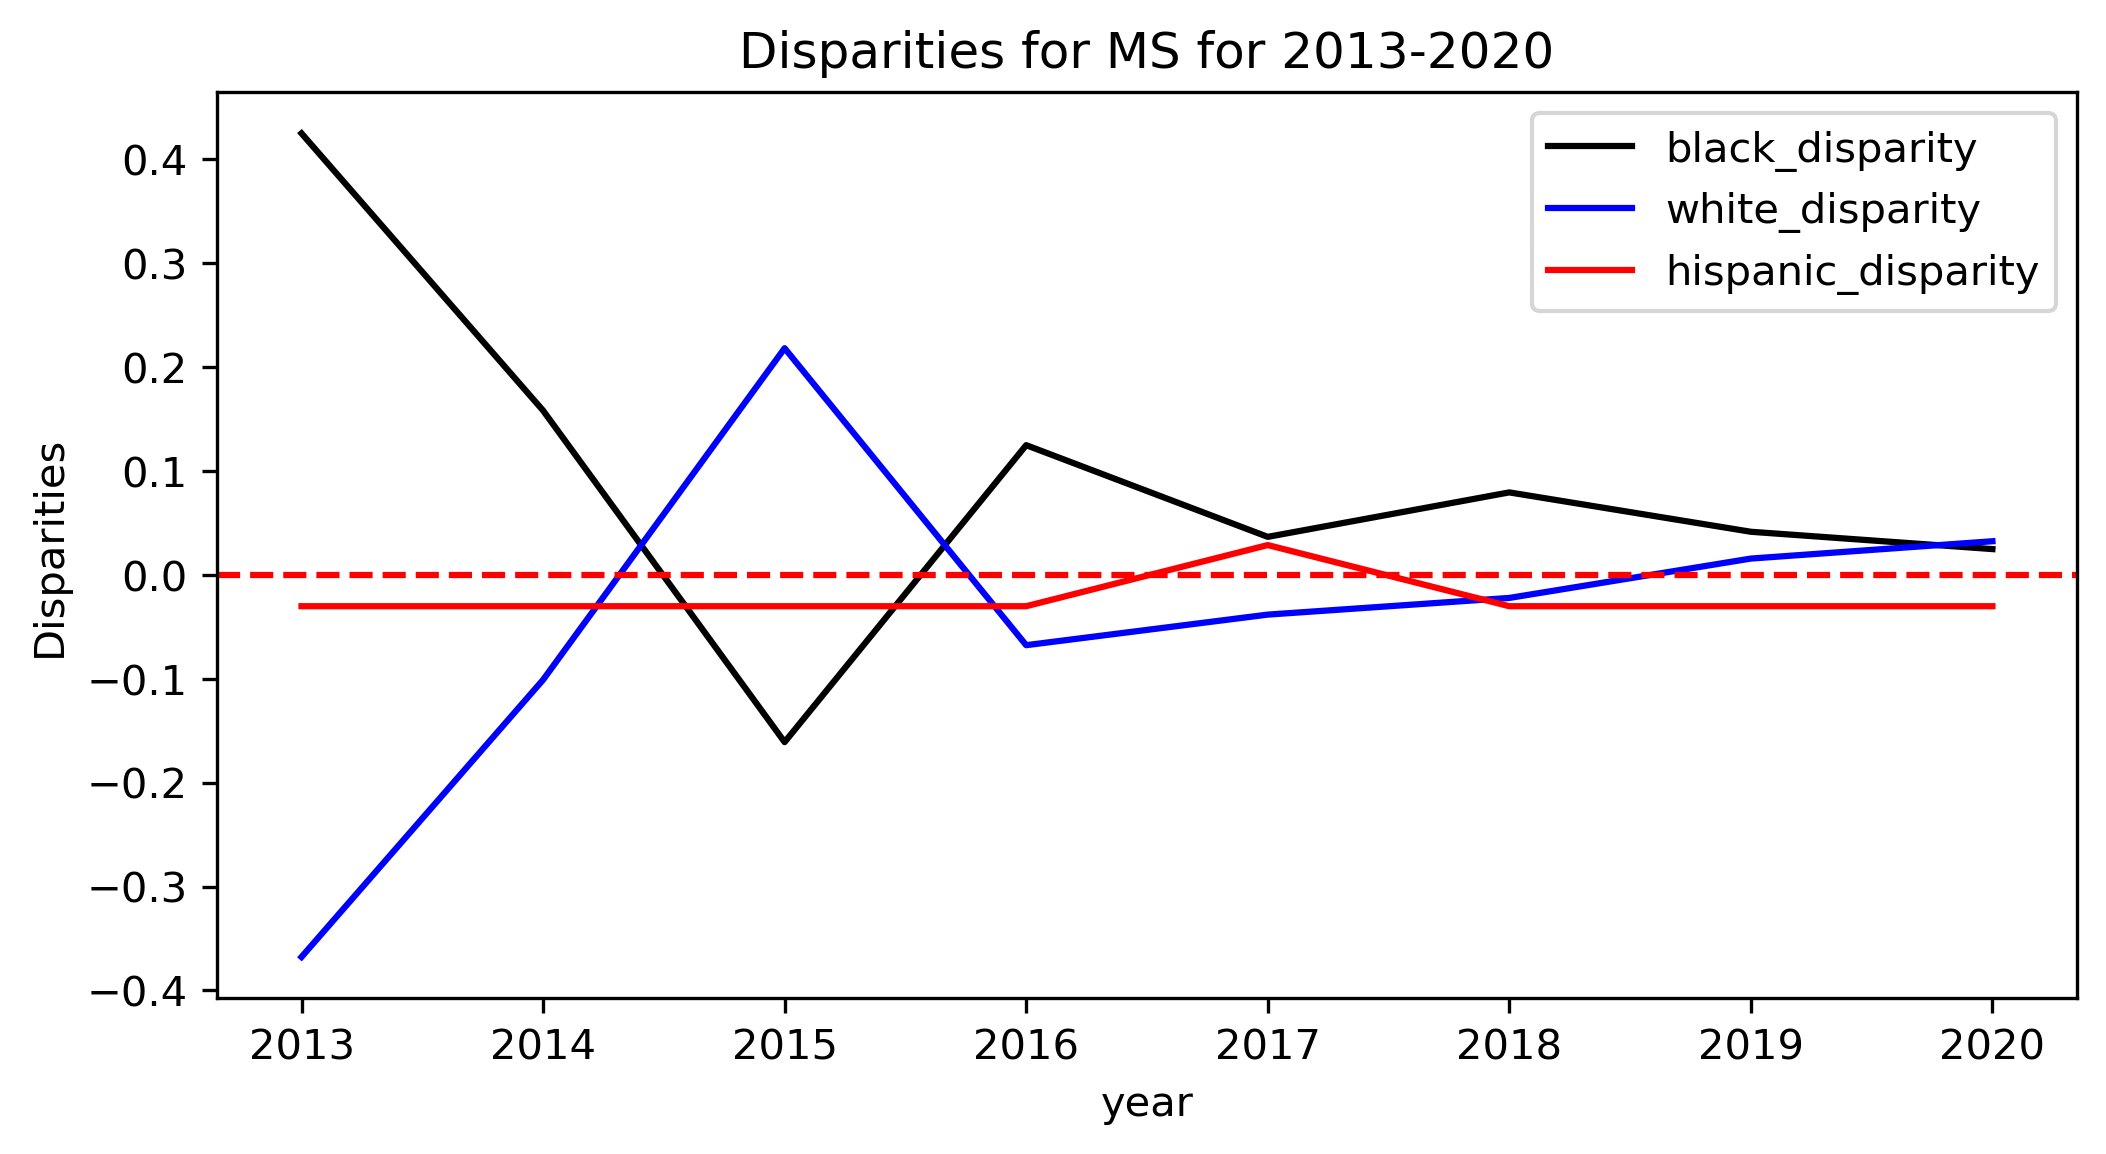

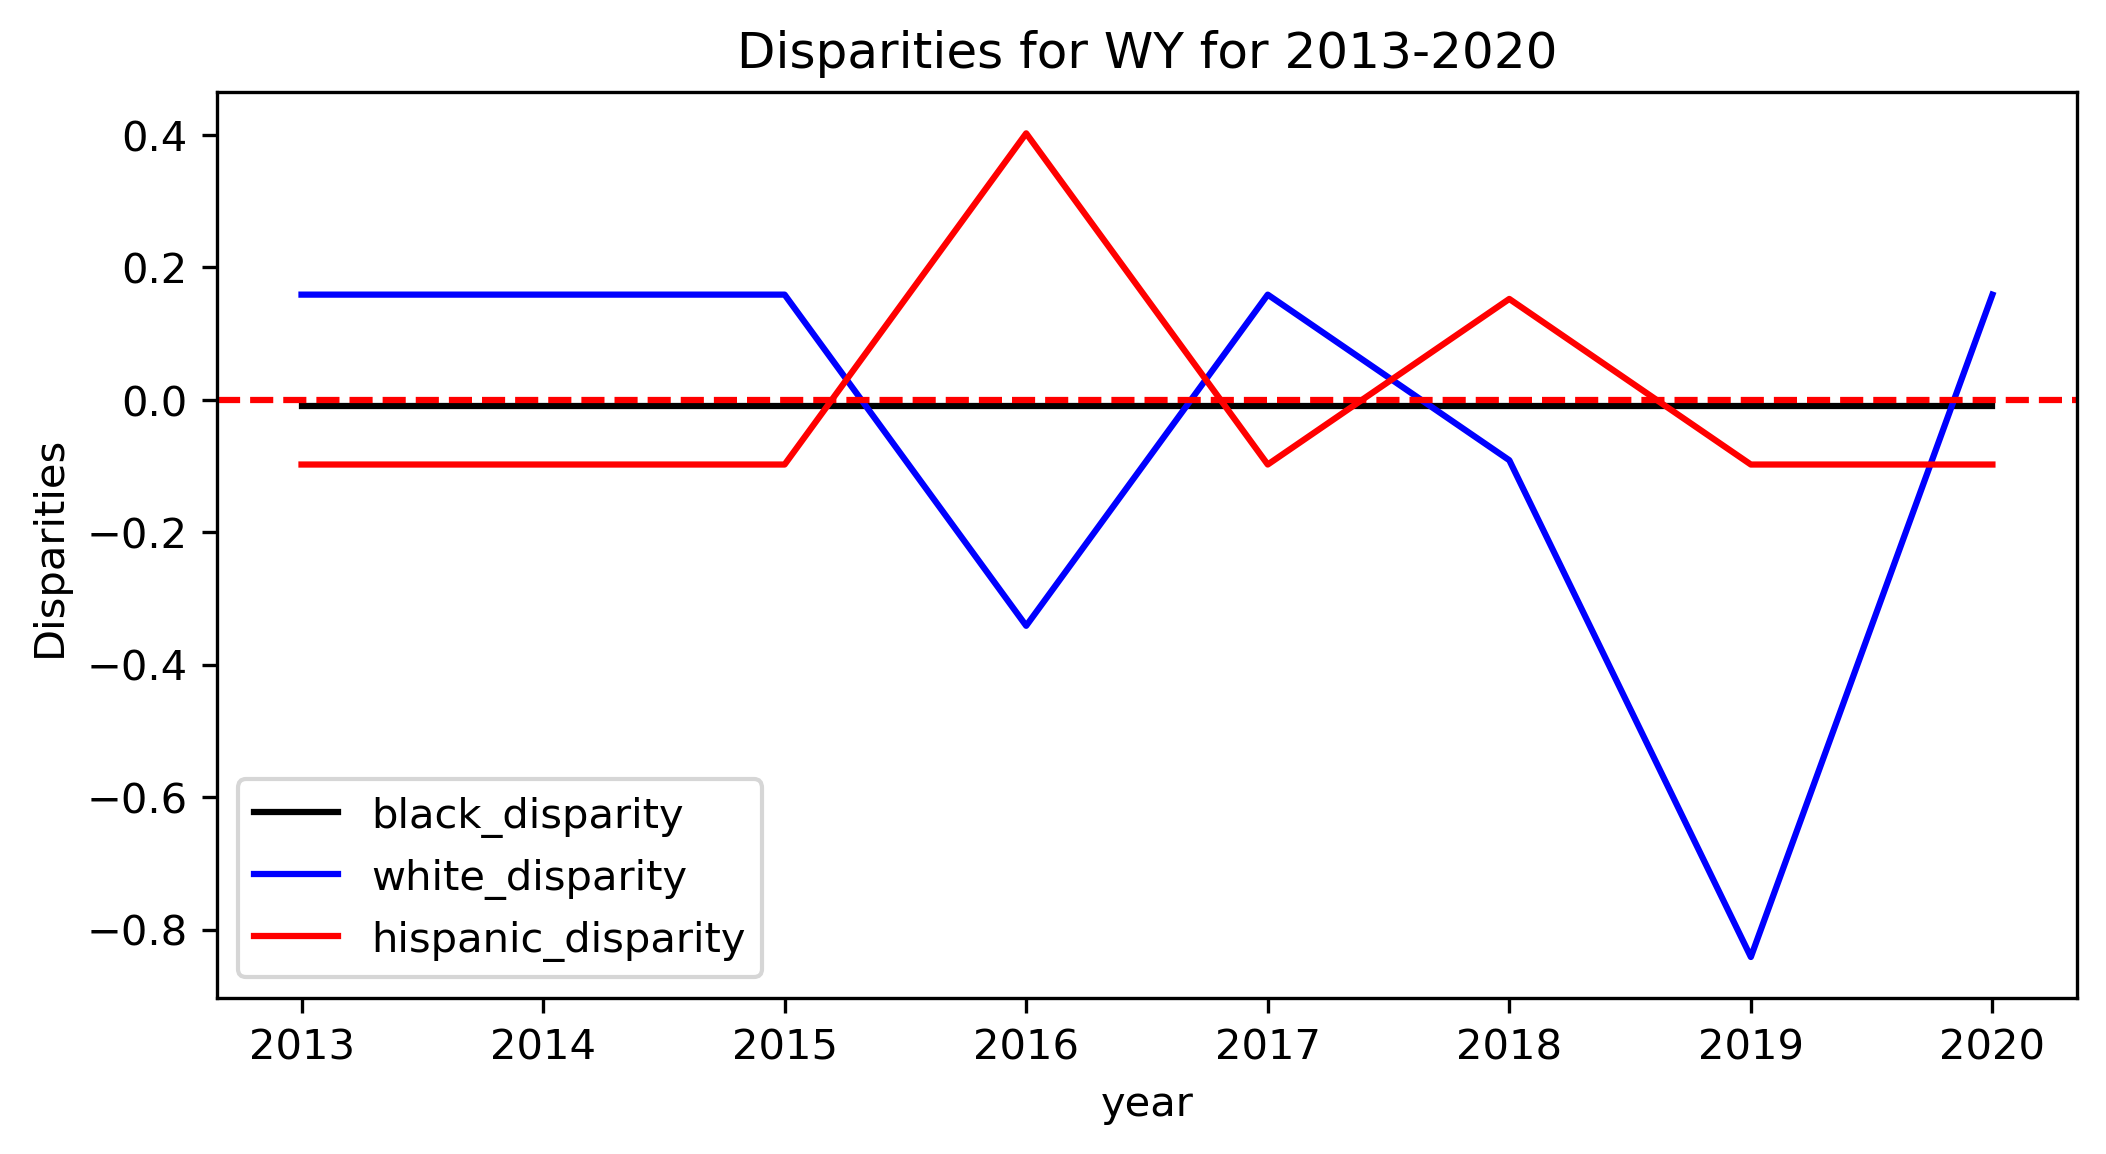

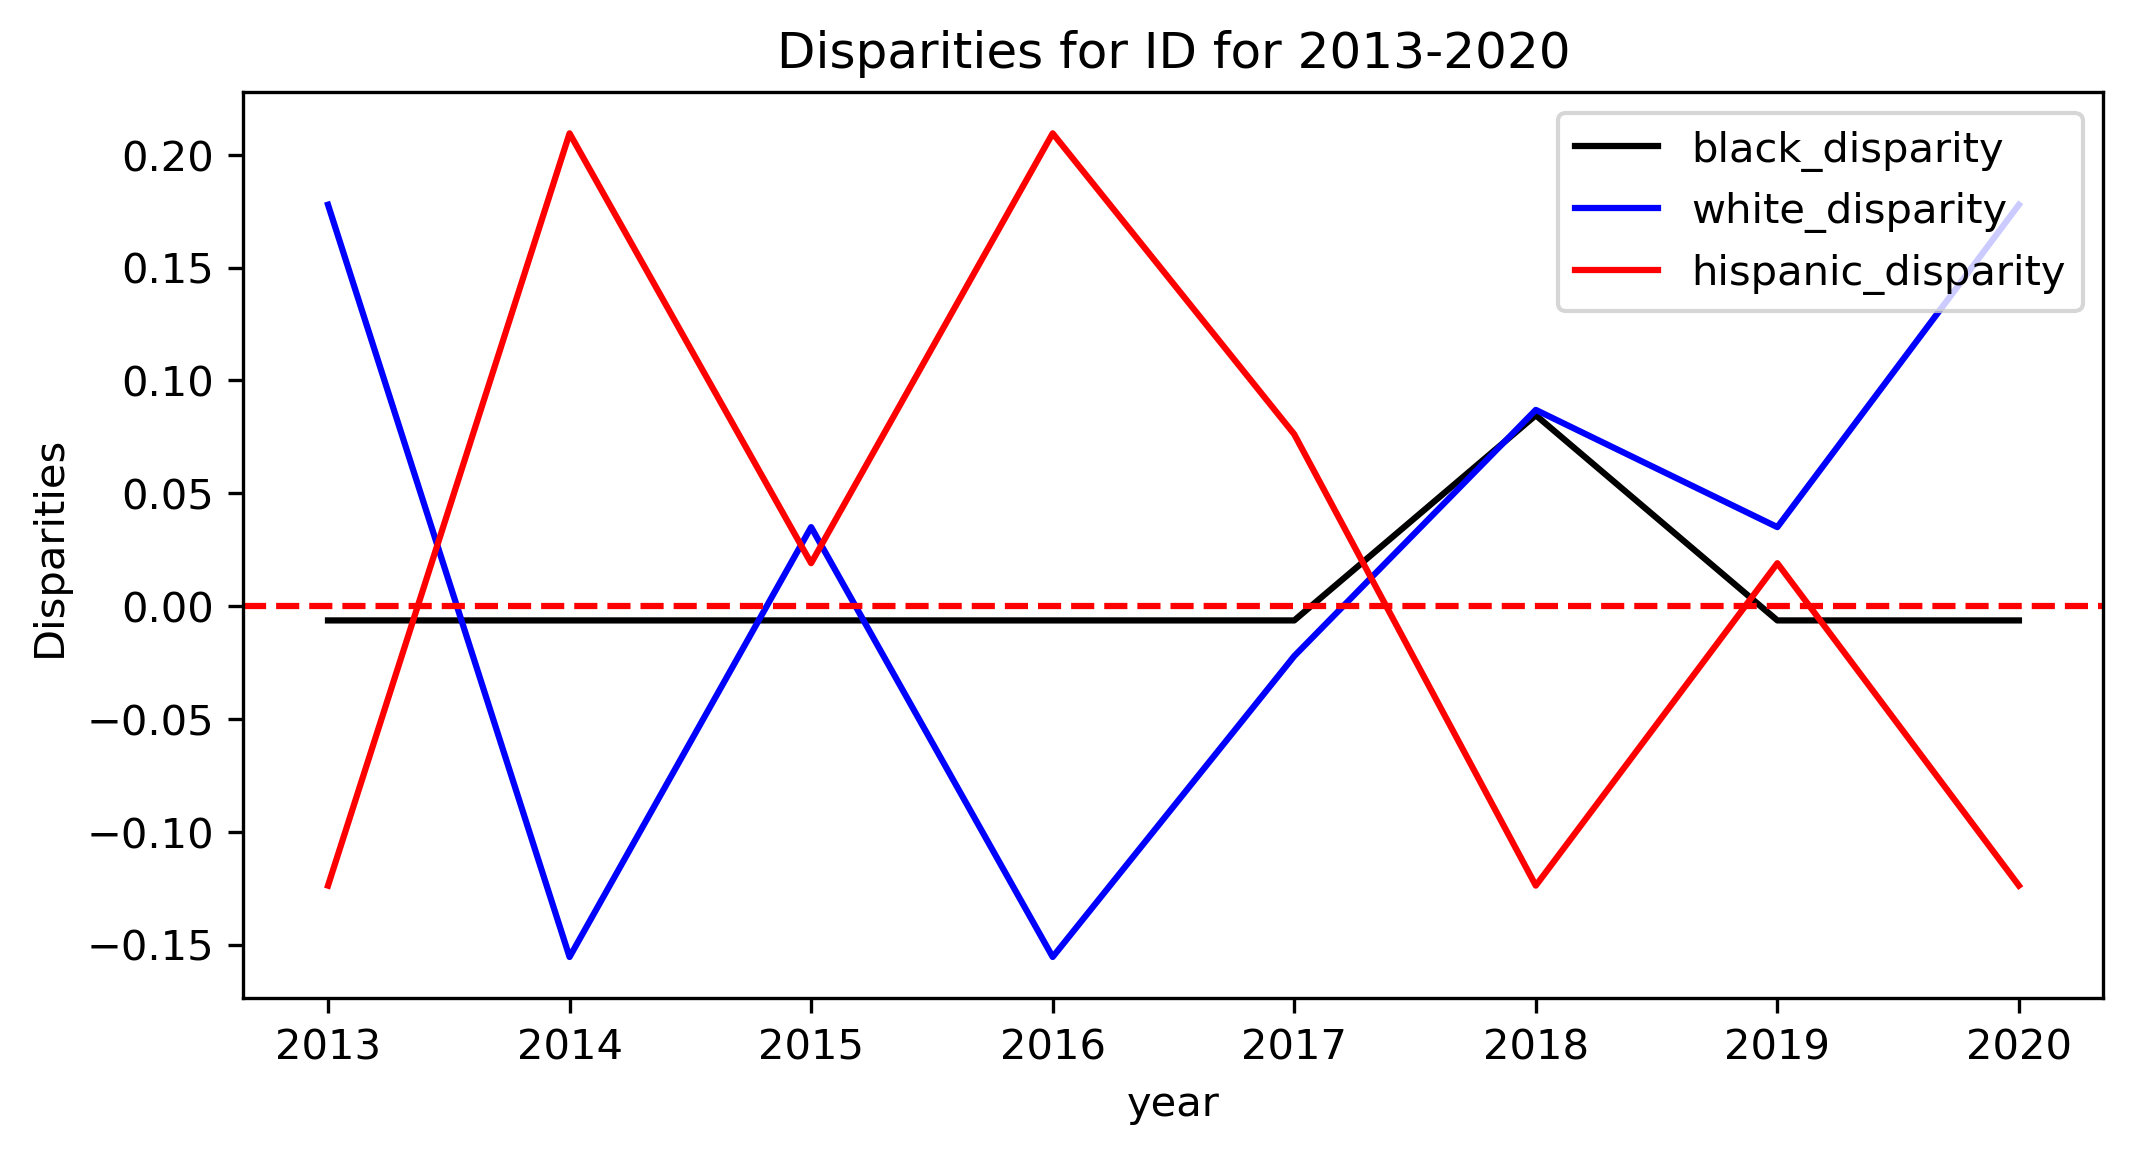

In [37]:
df = get_disparities_for_state(disparities_no_stops[["State", "Black", "Hispanic", "White"]], "MS")
df = get_disparities_for_state(disparities_no_stops[["State", "Black", "Hispanic", "White"]], "WY")
df = get_disparities_for_state(disparities_no_stops[["State", "Black", "Hispanic", "White"]], "ID")

### Observations

Intuitively, we'd expect that states with strict gun laws would have smaller disparity compared to the ones with loose ones but we observe quite the opposite. Specifically, in California and New Jersey, we observe that there is a constant gap between black and white disparity, when for Mississipi and Idaho ther quite intertwined. For Wyoming, our data showed that there were no black victims for police violence from 2013 which could be due to the very small percentage of black population in that state or due to incorrect victim race categorization as Unknown.